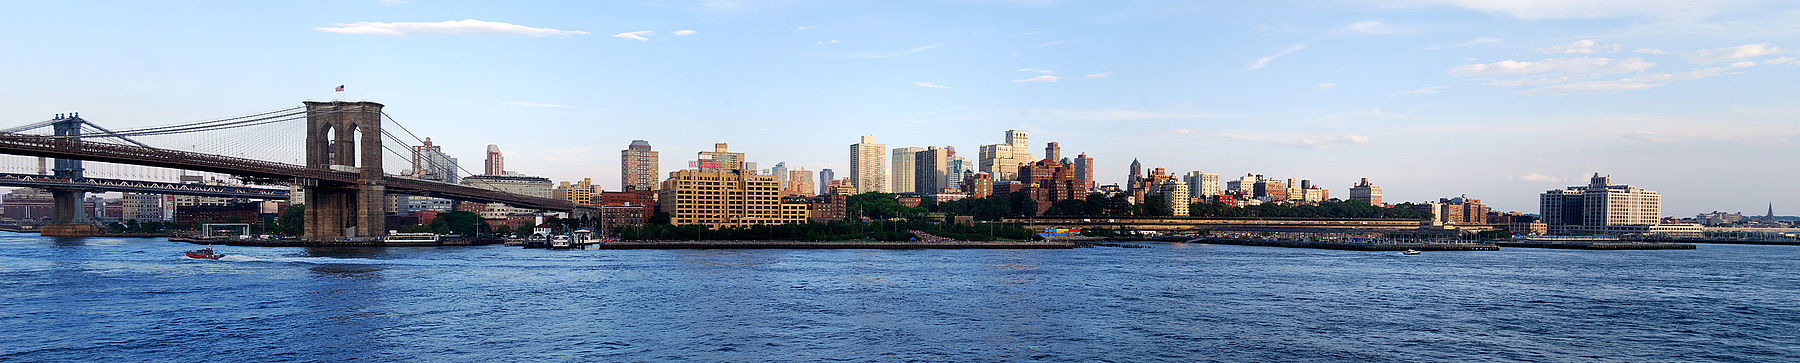

# **1) Introduction**
The New York City real estate market is rapidly heating up, making it increasingly difficult for homebuyers to assess the fair market value of properties. Brooklyn, in particular, has experienced a significant rise in housing prices in recent years due to growing demand. This trend has created an urgent need for a reliable method to estimate home values accurately.

To address this challenge, our project aims to develop a machine learning model that can accurately predict the sale price of homes in Brooklyn. This model will serve as a valuable tool for homebuyers, sellers, and real estate agents, enabling them to make more informed and confident decisions.

The project focuses on building a robust, data-driven pricing prediction system. We'll approach the problem step by step, ensuring clean, realistic data is used to train the model for maximum accuracy.

A key advantage of this project is its ability to serve two types of clients:

* Homebuyers: These clients are searching for their ideal home at a fair price. They have preferred neighborhoods in mind and want to know whether the listed price reflects the home’s true value. This tool will help them understand which features (e.g., number of bathrooms, location, square footage) most influence price, ensuring they make sound investments.

* Homesellers (e.g., House-Flippers): These clients aim to buy undervalued properties and increase their resale value through strategic improvements. By identifying the features that most impact pricing, sellers can focus their investments (e.g., adding rooms or enhancing layout) to maximize profit.

In short, this project provides a practical, data-driven solution to one of the most pressing problems in Brooklyn’s real estate market: understanding what a home is truly worth.


**Dataset**
* The dataset contains housing prices in Brooklyn from 2003–2017, and the features have been labeled to represent relevant information.
* The features with influence include:
    - **neighborhood**: the surrounding area or district
    - **tax_class**: tax classification
    - **block**: The tax block in which the tax lot is located
    - **lot**: The number of the tax lot.
    - **residential_units**: means a home, apartment, residential condominium unit or mobile home, serving as the principal place of residence.
    - **AssessLand**: The assessed land value for the tax lot.
    - **ExemptLand**: Tax-exempt land
    - **ExemptTot**: The exempt total value, which is determined differently for each exemption program, is the dollar amount related to that portion of the tax lot that has received an exemption.
    - **HistDist**: The name of the Historic District that the tax lot is within. Historic Districts are designated by the New York City Landmarks Preservation Commission.
    - **BuiltFAR**: the total floor area ratio, calculated as the total building floor area divided by the tax lot area.

* More details:

https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/pluto_datadictionary.pdf?v=18v1

https://www.kaggle.com/code/spmukherjee/predictions-on-brooklyn-housing-prices/notebook

# **2) Import libraries**

In [2]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

!pip install pyproj==1.9.6

!pip install contextily

!apt-get install libgdal-dev
!apt-get install libjpeg62
!pip install fiona
!pip install geopandas

!brew install wget
!wget -c "https://github.com/kjordahl/geopandas"

!pip install simplejson

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.12.1-1~jammy0).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
     / 129.7 MB 10.4 MB/s 0:00:12
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 64.1 MB/s eta 0:00:00
  Created wheel for basemap: filename=basemap-2.0.0-cp311-cp311-linux_x86_64.whl size=269012 sha256=f3839df09c4ae9e98b7414d3a6814383384e088e421ae13ce29aaf4c82562210
  Stored in directory: /tmp/pip-ephem-wheel-cache-z6qv494l/wheels/2b/19/29/933ca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyproj
  Running setup.py clean for pyproj
Failed to build pyproj
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pyproj)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 91.3 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgdal-dev is already the newest version (3.8.4+dfsg-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import contextily as ctx
import geopandas
import pandas as pd
import seaborn as sns; sns.set()
from mpl_toolkits.basemap import Basemap

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

# from sklearn.tree import DecisionTreeClassifier

# **3) Imports and Data Load**

In [3]:
# We make arrangement so that we can see the entire dataframe.
import os
os.chdir('/content/drive/MyDrive/Projects/brooklyn_sales')

pd.set_option('display.max_columns', 111)
path = 'Dataset/brooklyn_sales_map.csv'
df_house = pd.read_csv(path)
df_house

/tmp/ipython-input-3-3477473106.py:7: DtypeWarning: Columns (40,41,43,45,46,47,86) have mixed types. Specify dtype option on import or set low_memory=False.
  df_house = pd.read_csv(path)


,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_sale,building_class_at_sale,sale_price,sale_date,year_of_sale,Borough,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCent,HealthArea,SanitBoro,SanitDistr,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,COURT,11201,0,1,1,0.0,0.0,2002,4,R5,499401179.0,2008-04-23,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,NaN,G7,85 JAY STREET,NaN,11201,0,0,0,134988.0,0.0,0,4,G7,345000000.0,2016-12-20,2016,BK,302.0,21.00,3017.0,13.0,33.0,11201.0,L118,84.0,36.0,1000.0,3.0,2.0,1B,87 JAY STREET,M1-2/R8,NaN,NaN,NaN,NaN,NaN,MX-2,NaN,NaN,NaN,N,G7,10.0,0.0,P,85 JAY STREET BROOKLY,134988.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,490.50,275.33,0.0,0.00,NaN,0.0,N,5.0,5.0,1571850.0,1571850.0,1571850.0,1571850.0,0.0,0.0,0.0,NaN,NaN,0.00,7.20,2.0,6.5,3.0,3.000540e+09,0.0,21.0,988208.0,195011.0,12d,NaN,302 016,30101.0,NaN,3.000540e+09,12/06/2002,1.0,NaN,NaN,17V1.1,0.0,1559.889144,140131.577176
2,3,3,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,NaN,O6,29 COLUMBIA HEIGHTS,NaN,11201,0,0,0,32000.0,304650.0,1924,4,O6,340000000.0,2016-08-03,2016,BK,302.0,1.00,1003.0,13.0,33.0,11201.0,E205,84.0,38.0,2300.0,3.0,2.0,1A,29 COLUMBIA HEIGHTS,M2-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,O6,5.0,0.0,NaN,25-30 COLUMBIA HEIGHT,32000.0,304650.0,304650.0,0.0,264750.0,0.0,0.0,0.0,0.0,39900.0,2.0,1.0,13.0,0.0,0.0,92.42,335.92,335.0,92.00,NaN,0.0,Y,3.0,5.0,1548000.0,25463250.0,0.0,0.0,1924.0,1980.0,0.0,NaN,NaN,9.52,0.00,2.0,0.0,3.0,3.002040e+09,0.0,1.0,985952.0,195007.0,12d,NaN,302 004,30106.0,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,890.718521,34656.447240
3,4,3,MILL BASIN,22 STORE BUILDINGS,4,8470,55,NaN,K6,5120 AVENUE U,NaN,11234,0,123,123,905000.0,2548000.0,1970,4,K6,276947000.0,2012-11-28,2012,BK,318.0,698.00,2005.0,22.0,46.0,11234.0,E323,63.0,35.0,8822.0,3.0,18.0,4E,5120 AVENUE U,M3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,K6,5.0,1.0,NaN,BROOKLYN KINGS PLAZA,905000.0,2548000.0,2548000.0,0.0,0.0,1263000.0,1285000.0,0.0,0.0,0.0,2.0,4.0,2.0,0.0,123.0,930.00,859.00,0.0,0.00,NaN,0.0,Y,3.0,5.0,36532350.0,149792400.0,0.0,0.0,1970.0,0.0,0.0,NaN,NaN,2.82,0.00,2.0,0.0,3.0,3.084700e+09,0.0,698.0,1006597.0,161424.0,23b,NaN,319 077,32502.0,NaN,0.000000e+00,NaN,1.0,1.0,1.0,17V1.1,0.0,3729.786857,797554.847834
4,5,3,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,230,1,NaN,H8,21 CLARK STREET,NaN,11201,0,1,1,20267.0,356000.0,1927,4,H8,202500000.0,2017-10-31,2017,BK,302.0,3.01,2000.0,13.0,33.0,11201.0,E205,84.0,38.0,2300.0,3.0,2.0,1A,79 WILLOW STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LH-1,N,H8,8.0,0.0,X,WATCHTOWER C/O REAL P,20267.0,356000.0,30000.0,0.0,30000.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,15.0,0.0,1.0,202.00,100.33,202.0,100.33,NaN,0.0,N,3.0,2.0,2250000.0,27166050.0,225

In [4]:
# Observing DataFrame
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390883 entries, 0 to 390882
Columns: 111 entries, Unnamed: 0 to SHAPE_Area
dtypes: float64(64), int64(11), object(36)
memory usage: 331.0+ MB


In [5]:
# Show df_loan size (rows x columns)
df_house.shape

(390883, 111)

In [6]:
df_house.head()

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_sale,building_class_at_sale,sale_price,sale_date,year_of_sale,Borough,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,PolicePrct,HealthCent,HealthArea,SanitBoro,SanitDistr,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,LandUse,Easements,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,Ext,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,HistDist,Landmark,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,COURT,11201,0,1,1,0.0,0.0,2002,4,R5,499401179.0,2008-04-23,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,NaN,G7,85 JAY STREET,NaN,11201,0,0,0,134988.0,0.0,0,4,G7,345000000.0,2016-12-20,2016,BK,302.0,21.00,3017.0,13.0,33.0,11201.0,L118,84.0,36.0,1000.0,3.0,2.0,1B,87 JAY STREET,M1-2/R8,NaN,NaN,NaN,NaN,NaN,MX-2,NaN,NaN,NaN,N,G7,10.0,0.0,P,85 JAY STREET BROOKLY,134988.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,490.50,275.33,0.0,0.00,NaN,0.0,N,5.0,5.0,1571850.0,1571850.0,1571850.0,1571850.0,0.0,0.0,0.0,NaN,NaN,0.00,7.20,2.0,6.5,3.0,3.000540e+09,0.0,21.0,988208.0,195011.0,12d,NaN,302 016,30101.0,NaN,3.000540e+09,12/06/2002,1.0,NaN,NaN,17V1.1,0.0,1559.889144,140131.577176
2,3,3,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,NaN,O6,29 COLUMBIA HEIGHTS,NaN,11201,0,0,0,32000.0,304650.0,1924,4,O6,340000000.0,2016-08-03,2016,BK,302.0,1.00,1003.0,13.0,33.0,11201.0,E205,84.0,38.0,2300.0,3.0,2.0,1A,29 COLUMBIA HEIGHTS,M2-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,O6,5.0,0.0,NaN,25-30 COLUMBIA HEIGHT,32000.0,304650.0,304650.0,0.0,264750.0,0.0,0.0,0.0,0.0,39900.0,2.0,1.0,13.0,0.0,0.0,92.42,335.92,335.0,92.00,NaN,0.0,Y,3.0,5.0,1548000.0,25463250.0,0.0,0.0,1924.0,1980.0,0.0,NaN,NaN,9.52,0.00,2.0,0.0,3.0,3.002040e+09,0.0,1.0,985952.0,195007.0,12d,NaN,302 004,30106.0,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,890.718521,34656.447240
3,4,3,MILL BASIN,22 STORE BUILDINGS,4,8470,55,NaN,K6,5120 AVENUE U,NaN,11234,0,123,123,905000.0,2548000.0,1970,4,K6,276947000.0,2012-11-28,2012,BK,318.0,698.00,2005.0,22.0,46.0,11234.0,E323,63.0,35.0,8822.0,3.0,18.0,4E,5120 AVENUE U,M3-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,K6,5.0,1.0,NaN,BROOKLYN KINGS PLAZA,905000.0,2548000.0,2548000.0,0.0,0.0,1263000.0,1285000.0,0.0,0.0,0.0,2.0,4.0,2.0,0.0,123.0,930.00,859.00,0.0,0.00,NaN,0.0,Y,3.0,5.0,36532350.0,149792400.0,0.0,0.0,1970.0,0.0,0.0,NaN,NaN,2.82,0.00,2.0,0.0,3.0,3.084700e+09,0.0,698.0,1006597.0,161424.0,23b,NaN,319 077,32502.0,NaN,0.000000e+00,NaN,1.0,1.0,1.0,17V1.1,0.0,3729.786857,797554.847834
4,5,3,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,230,1,NaN,H8,21 CLARK STREET,NaN,11201,0,1,1,20267.0,356000.0,1927,4,H8,202500000.0,2017-10-31,2017,BK,302.0,3.01,2000.0,13.0,33.0,11201.0,E205,84.0,38.0,2300.0,3.0,2.0,1A,79 WILLOW STREET,R6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LH-1,N,H8,8.0,0.0,X,WATCHTOWER C/O REAL P,20267.0,356000.0,30000.0,0.0,30000.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,15.0,0.0,1.0,202.00,100.33,202.0,100.33,NaN,0.0,N,3.0,2.0,2250000.0,27166050.0,225

We describe the data and append in it the number of NaN's in each column in the last row. We see that there are many columns with NaNs. Our next step will be to clean this data as much as possible.

In [7]:
# Check for missing data
# Get missing value counts and convert to DataFrame
missing = df_house.isnull().sum().rename('isnull')

# Combine using pd.concat
summary = pd.concat([df_house.describe(), missing.to_frame().T])
summary

,Unnamed: 0,borough,block,lot,easement,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_sale,sale_price,year_of_sale,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,PolicePrct,HealthCent,HealthArea,SanitBoro,SanitDistr,LandUse,Easements,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,ProxCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,TaxMap,APPBBL,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,neighborhood,building_class_category,tax_class,building_class,address,apartment_number,building_class_at_sale,sale_date,Borough,FireComp,SanitSub,Address,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,Overlay1,Overlay2,SPDist1,SPDist2,SPDist3,LtdHeight,SplitZone,BldgClass,OwnerType,OwnerName,Ext,IrrLotCode,HistDist,Landmark,ZoneMap,ZMCode,Sanborn,EDesigNum,APPDate,Version
count,390883.000000,390883.0,390883.000000,390883.000000,0.0,390883.000000,390883.000000,390883.000000,390883.000000,3.908830e+05,3.908830e+05,390883.000000,390883.000000,3.908830e+05,390883.000000,303728.000000,303436.000000,302515.000000,303688.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303238.000000,303238.000000,302711.000000,303728.000000,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303706.000000,303706.000000,303706.000000,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.0,3.037280e+05,303728.000000,303728.000000,3.037280e+05,303728.000000,303710.000000,3.037280e+05,303728.000000,8653.0,27773.0,303728.000000,303728.000000,3.037280e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,195442.000000,3.0,4275.651169,272.509986,NaN,11208.429087,2.486138,0.174142,2.673227,2.368464e+03,2.970877e+03,1701.666307,1.642660,5.067545e+05,2009.478243,309.783211,492.221200,1971.065160,19.089803,40.888522,11207.063718,71.830012,34.460293,5758.185060,3.000326,9.776390,2.188791,0.007049,8.459416e+03,2.361238e+04,1.207292e+03,2.221657e+04,1.584349e+02,2.743297e+02,2.489965e+02,1.156844e+02,1.732853e+02,209.225606,2.086038,1.314824,3.102166,22.082923,22.347620,53.086843,109.695027,39.399567,59.381591,1.566637,4.742886,2.439326,1.209784e+05,7.813468e+05,4.136623e+04,8.105911e+04,1879.716700,295.778483,34.019662,1.662472,1.828681,0.153269,2.854437,3.0,3.045066e+09,0.029987,4715.545455,9.921077e+05,175146.073694,31396.728152,1.927884e+08,1.000145,1.0,1.0,0.000244,337.445796,8.645885e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,112838.346973,0.0,2642.765332,484.658837,NaN,361.207836,48.200178,1.653362,48.233343,2.509129e+04,1.453960e+04,636.764362,0.906378,2.353965e+06,4.504907,5.457593,331.650433,992.300369,4.221940,4.648494,382.456905,8.632760,2.514558,2576.513859,0.019130,5.455605,1.912236,0.086297,3.140562e+04,8.164505e+04,1.307823e+04,7.949109e+04,4.274347e+03,3.486221e+03,5.525525e+03,5.206794e+03,5.201557e+03,4586.906650,0.560690,2.247752,2.927788,79.764423,79.954151,99.398538,63.857962,56.369625,43.217604,1.206424,0.701608,1.559428,7.152424e+05,3.227031e+06,2.495788e+05,1.524291e+06,317.759012,710.334178,259.086380,1.549262,1.139002,0.811046,1.428735,0.0,2.571172e+07,8.840051,17545.128104,7.391759e+04,18390.569903,754.905314,7.409608e+08,0.017021,0.0,0.0,0.036740,329.587401,3.116106e+04,NaN,NaN,NaN,NaN,NaN,NaN

In [8]:
# List of column names in df
df_house.columns.values

array(['Unnamed: 0', 'borough', 'neighborhood', 'building_class_category',
       'tax_class', 'block', 'lot', 'easement', 'building_class',
       'address', 'apartment_number', 'zip_code', 'residential_units',
       'commercial_units', 'total_units', 'land_sqft', 'gross_sqft',
       'year_built', 'tax_class_at_sale', 'building_class_at_sale',
       'sale_price', 'sale_date', 'year_of_sale', 'Borough', 'CD',
       'CT2010', 'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'FireComp',
       'PolicePrct', 'HealthCent', 'HealthArea', 'SanitBoro',
       'SanitDistr', 'SanitSub', 'Address', 'ZoneDist1', 'ZoneDist2',
       'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1',
       'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea',
       'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors

# **4) Data processing**
---
A big simplification can be done by removing duplicate columns. Also there are some coumns refering various map ID or file numbers which supposedly have no impact on any of the predictions made. We can easily remove 59 columns on various grounds.



1.   'Unnamed: 0' It's the ID number associated with each sale.

1.   We remove both 'borough' & 'Borough' since we are working on Brooklyn borough only.

1.   'apartment_number' about 80% missing data

1.   'Ext' EXTENSION CODE

1.   'Landmark' we delete this because we also have address and neighbourhood to specify the importance of the location

1.   'AreaSource' A code indicating the source file that was used to determine the tax lot's TOTAL BUILDING FLOOR AREA (BldgArea)

1.   'UnitsRes' The sum of residential units in all buildings on the tax lot. Same as 'residential_units'

1.   'UnitsTotal' The sum of residential and non-residential (offices, retail stores, etc.) units in all buildings on the tax lot. Same as 'total_units'.

1.   'LotArea' Total area of the tax lot, expressed in square feet rounded to the nearest integer. This is same as 'lot'

1.   'BldgArea' The total gross area in square feet. Same as 'gross_sqft'

1.   'BldgClass' Same as 'building_class'

1.   'Easements', 'easement' we delete both. The number of easements on the tax lot. As this is not important for most of the sales.

1.   'OwnerType' A code indicating type of ownership for the tax lot

1.   'building_class_category' same as 'building_class'

1.   'sale_date' date of sale but we keep only the year in 'year_of_sale'

1.   'CT2010' The 2010 census tract that the tax lot is located in. Not considered to be important.

1.   'CB2010' The 2010 census block that the tax lot is located in. Not considered to be important.

1.   'ZipCode' same as 'zip_code'

1.   'ZoneDist1' The zoning district classification of the tax lot,
          ZONING DISTRICT 1 represents the zoning district classification occupying the greatest percentage of the tax lot’s area.
         'ZoneDist2' If the tax lot is divided by zoning boundary lines,Zoning, ZONING DISTRICT 2 represents the zoning classification occupying the second greatest percentage of the tax lot's area.
         'ZoneDist3' If the tax lot is divided by zoning boundary lines, ZONING, ZONING DISTRICT 3 represents the zoning classification occupying the third greatest percentage of the tax lot's area.
         'ZoneDist4' If the tax lot is divided by zoning boundary lines, Zoning, ZONING DISTRICT 4 represents the zoning classification occupying the fourth greatest percentage of the tax lot's area.

1.   'Overlay1' The commercial overlay assigned to the tax lot. 'Overlay2' A commercial overlay associated with the tax lot.

1.   'SPDist1' The special purpose district assigned to the tax lot.
          SPECIAL PURPOSE DISTRICT 1 represents the special purpose district occupying the greatest percentage of the lot area.
         'SPDist2' SPECIAL PURPOSE DISTRICT 2 represents the special purpose district occupying the second greatest percentage of the lot area.
         'SPDist3' SPECIAL PURPOSE DISTRICT 3 represents the special purpose district occupying the smallest percentage of the lot area.

1.   'LtdHeight' Limited height districts are coded using the three to five character district symbols

1.   'YearBuilt' same as 'year_built'

1.   'BoroCode' same as 'Borough'

1.   'BBL' A concatenation of the borough code, tax block and tax lot.

1.   'Tract2010' The 2010 census tract that the tax lot is located in.

1.   'ZoneMap' The Department of City Planning Zoning Map Number associated with the tax lot’s X and Y Coordinates.

1.   'ZMCode' A code (Y) identifies a border Tax Lot, i.e., a Tax Lot on the border of two or more Zoning Maps.

1.   'Sanborn' The Sanborn Map Company map number associated with the tax block and lot.

1.   'TaxMap' The Department of Finance paper tax map Volume Number associated with the tax block and lot.

1.   'EDesigNum' The E-Designation number assigned to the tax lot.

1.   'PLUTOMapID' A code indicating whether the tax lot is in the PLUTO file and/or the modified DTM and/or the modified DTM Clipped to the Shoreline File.

1.   'FIRM07_FLA' A one character field. Code of 1 means that some portion of the tax lot falls within the 1% annual chance floodplain as determined by FEMA’s 2007 Flood Insurance Rate Map.

1.   'PFIRM15_FL' A one character field. Code of 1 means that some portion of the tax lot falls within the 1% annual chance floodplain as determined by FEMA’s 2015 Preliminary Flood Insurance Rate Map.

1.   'Version' The Version Number related to the release of PLUTO.

1.   'MAPPLUTO_F' No description found.

1.   'APPBBL' The originating Borough, Tax Block and Tax Lot from the apportionment prior to the merge, split or property’s conversion to a condominium. The Apportionment BBL is only available for mergers, splits and conversions since 1984.

1.   'APPDate' The date of the Apportionment.

1.   'SHAPE_Leng', 'SHAPE_Area no description of both so we drop

1.   'CD' The community district (CD) or joint interest area (JIA) that the tax lot is located in, or partially located in.

1.   'SchoolDist' The community school district that the tax lot is located in.

1.   'Council' The city council district that the tax lot is located in.

1.   'PolicePrct' The police precinct the tax lot is located in. This field contains a three digit police precinct number.

1.   'HealthCent' The health center district that the tax lot is located in.

1.   'SanitBoro' The Boro of the Sanitation District that services the tax lot.

1.   'SanitDistr' The Sanitation District that services the tax lot.

1.   'FireComp' The fire company that services the tax lot.

1.   'SanitSub' The Subsection of the Sanitation District that services the tax lot.

1.   'CondoNo' The condominium number assigned to the complex.

1.   'Address' same as 'address'


axis = 1 -> by column

axis = 0 -> by row

In [9]:
columns = ['Unnamed: 0', 'borough', 'Borough','apartment_number', 'Ext', 'Landmark','AreaSource', 'UnitsRes',
           'UnitsTotal', 'LotArea', 'BldgArea','BldgClass', 'Easements', 'easement', 'OwnerType', 'building_class_category',
           'sale_date', 'CT2010', 'CB2010', 'ZipCode', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
           'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'YearBuilt', 'BoroCode', 'BBL', 'Tract2010', 'ZoneMap',
           'ZMCode', 'Sanborn', 'TaxMap', 'EDesigNum', 'PLUTOMapID', 'FIRM07_FLA', 'PFIRM15_FL', 'Version', 'MAPPLUTO_F',
           'APPBBL', 'APPDate', 'SHAPE_Leng', 'SHAPE_Area', 'CD', 'SchoolDist', 'Council', 'PolicePrct', 'HealthCent',
           'SanitBoro', 'SanitDistr','FireComp','SanitSub', 'CondoNo','Address']

df_house.drop(columns, inplace=True, axis=1)

In [10]:
# List of column names in df
df_house.columns.values

array(['neighborhood', 'tax_class', 'block', 'lot', 'building_class',
       'address', 'zip_code', 'residential_units', 'commercial_units',
       'total_units', 'land_sqft', 'gross_sqft', 'year_built',
       'tax_class_at_sale', 'building_class_at_sale', 'sale_price',
       'year_of_sale', 'HealthArea', 'SplitZone', 'LandUse', 'OwnerName',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs', 'NumFloors',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'ProxCode',
       'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand', 'AssessTot',
       'ExemptLand', 'ExemptTot', 'YearAlter1', 'YearAlter2', 'HistDist',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'XCoord', 'YCoord'],
      dtype=object)

**We only consider rows for which the sale price is non zero. As zero sale price is associated with a transfer of property so we safely delete those.**

**We have replaced zeros/NaNs in many variables with median/mode.**

**Some other categorical variables were filled by 0 like 'OwnerName', 'IrrLotCode', 'SplitZone'. For 'XCoord' and 'YCoord' we have replaced the NaN and 0s by Mode(0). Same is for variables 'YearAlter1' and 'YearAlter2'. Mostly for continuous variables we have replaced the missing values by median/mean.**

Mode: is the value that appears most often in the set.

Std: Calculate standard deviation.

In [11]:
df_house = df_house[df_house['sale_price']!=0]

df_house['gross_sqft']=df_house['gross_sqft'].replace(0.0,df_house['gross_sqft'].median())
df_house['land_sqft']=df_house['land_sqft'].replace(0.0,df_house['land_sqft'].median())

df_house['NumBldgs']= df_house['NumBldgs'].fillna(df_house['NumBldgs'].median())
df_house['NumFloors']= df_house['NumFloors'].fillna(df_house['NumFloors'].median())
df_house['ProxCode']= df_house['ProxCode'].fillna(df_house['ProxCode'].mode()[0])
df_house['LotType']= df_house['LotType'].fillna(df_house['LotType'].mode()[0])
df_house['BsmtCode']= df_house['BsmtCode'].fillna(df_house['BsmtCode'].mode()[0])
df_house['LandUse']= df_house['LandUse'].fillna(df_house['LandUse'].mode()[0])
df_house['AssessLand']= df_house['AssessLand'].fillna(df_house['AssessLand'].median())
df_house['AssessTot']= df_house['AssessTot'].fillna(df_house['AssessTot'].median())
df_house['ExemptLand']= df_house['ExemptLand'].fillna(df_house['ExemptLand'].median())
df_house['ExemptTot']= df_house['ExemptTot'].fillna(df_house['ExemptTot'].median())
df_house['BuiltFAR']= df_house['BuiltFAR'].fillna(df_house['BuiltFAR'].median())
df_house['ResidFAR']= df_house['ResidFAR'].fillna(df_house['ResidFAR'].median())
df_house['CommFAR']= df_house['CommFAR'].fillna(df_house['CommFAR'].median())
df_house['FacilFAR']= df_house['FacilFAR'].fillna(df_house['FacilFAR'].mean())
df_house['OwnerName']= df_house['OwnerName'].fillna(value=0)
df_house['IrrLotCode']= df_house['IrrLotCode'].fillna(value=0)
df_house['SplitZone']= df_house['SplitZone'].fillna(value=0)
df_house['XCoord']= df_house['XCoord'].fillna(df_house['XCoord'].mode()[0])
df_house['YCoord']= df_house['YCoord'].fillna(df_house['YCoord'].mode()[0])
df_house['XCoord']= df_house['XCoord'].replace(0.0,df_house['XCoord'].mode()[0] )
df_house['YCoord']= df_house['YCoord'].replace(0.0,df_house['YCoord'].mode()[0] )

df_house['ComArea']= df_house['ComArea'].fillna(df_house['ComArea'].median())
df_house['ResArea']= df_house['ResArea'].fillna(df_house['ResArea'].median())
df_house['OfficeArea']= df_house['OfficeArea'].fillna(df_house['OfficeArea'].median())
df_house['RetailArea']= df_house['RetailArea'].fillna(df_house['RetailArea'].median())
df_house['GarageArea']= df_house['GarageArea'].fillna(df_house['GarageArea'].median())
df_house['OtherArea']= df_house['OtherArea'].fillna(df_house['OtherArea'].median())
df_house['StrgeArea']= df_house['StrgeArea'].fillna(df_house['StrgeArea'].median())
df_house['FactryArea']= df_house['FactryArea'].fillna(df_house['FactryArea'].median())
df_house['LotFront']= df_house['LotFront'].fillna(df_house['LotFront'].median())
df_house['LotDepth']= df_house['LotDepth'].fillna(df_house['LotDepth'].median())
df_house['BldgFront']= df_house['BldgFront'].fillna(df_house['BldgFront'].median())
df_house['BldgDepth']= df_house['BldgDepth'].fillna(df_house['BldgDepth'].median())
df_house['HealthArea']= df_house['HealthArea'].fillna(df_house['HealthArea'].median())
df_house['YearAlter1']= df_house['YearAlter1'].fillna(df_house['YearAlter1'].mode()[0])
df_house['YearAlter2']= df_house['YearAlter2'].fillna(df_house['YearAlter2'].mode()[0])

/tmp/ipython-input-11-674371747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['gross_sqft']=df_house['gross_sqft'].replace(0.0,df_house['gross_sqft'].median())
/tmp/ipython-input-11-674371747.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['land_sqft']=df_house['land_sqft'].replace(0.0,df_house['land_sqft'].median())
/tmp/ipython-input-11-674371747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

**The categorical variables are categorized.**

a.astype (new type): Converts the data type of the elements

Unique: checks how many different elements there are in the data set

In [12]:
df_house['HistDist'].fillna(0.0, inplace=True)
df_house['HistDist']=df_house['HistDist'].astype('category')
df_house['HistDist']=df_house['HistDist'].cat.codes
df_house['HistDist'].unique()

/tmp/ipython-input-12-2240201489.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_house['HistDist'].fillna(0.0, inplace=True)
/tmp/ipython-input-12-2240201489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['HistDist'].fillna(0.0, inplace=True)
/tmp/ipython-input-12-2240201489.py:2: SettingWithCopyWarning: 
A value is trying

array([ 0,  8,  6, 11, 15, 13, 28, 24, 16, 27, 17, 12, 29, 30, 14,  4, 19,
       22,  7, 23,  5,  9, 32, 33,  3, 34, 31, 18, 25, 21, 35, 26, 20, 10,
        1,  2], dtype=int8)

In [13]:
df_house['neighborhood'] = df_house['neighborhood'].astype('category')
df_house['neighborhood'] = df_house['neighborhood'].cat.codes
df_house['neighborhood'].unique()

/tmp/ipython-input-13-3873602750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['neighborhood'] = df_house['neighborhood'].astype('category')
/tmp/ipython-input-13-3873602750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['neighborhood'] = df_house['neighborhood'].cat.codes


array([24, 22,  9, 43, 60, 59, 44, 32, 23, 14, 36, 11, 19, 12, 10, 45, 49,
       38, 34, 13,  3, 42, 17, 16, 30, 27,  6, 20, 56, 54, 62,  2, 58,  8,
       52, 35, 55, 21, 51, 28, 41,  7, 26, 46, 57,  5, 29, 15, 39,  4, 50,
       18,  1, 47, 31, 48, 37, 25, 40, 61, 33, 53,  0], dtype=int8)

**We split the 'address' into number and 'street name'. Convert the 'street name' to categorical variable and delete the number column along with 'address'.**

In [14]:
df_house[['number','street name']] = df_house['address'].str.split(n=1, expand=True)
del df_house['address']
del df_house['number']
df_house['street name'] = df_house['street name'].astype('category')
df_house['street name'] = df_house['street name'].cat.codes

/tmp/ipython-input-14-3953405453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house[['number','street name']] = df_house['address'].str.split(n=1, expand=True)
/tmp/ipython-input-14-3953405453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house[['number','street name']] = df_house['address'].str.split(n=1, expand=True)
/tmp/ipython-input-14-3953405453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

**We see the missing values in 'tax_class' and replace them by the corresponding values from 'tax_class_at_sale'. The convert 'tax_class' to categorical. Same is done for the missing values in 'building_class' by replacing the missing values from 'building_class_at_sale'.**

map: Perform conversion to integer

In [15]:
print(df_house['tax_class'].unique())
print(df_house['tax_class'].isnull().sum())
print(df_house['tax_class_at_sale'].unique())
print(df_house['tax_class_at_sale'].isnull().sum())
df_house['tax_class'] = df_house['tax_class'].map({'1B': 5, '2A': 6, '2B':7, '1A':8, '2C':9, '3':3,'4':4,'2':2,'1':1})
df_house['tax_class'].fillna(df_house['tax_class_at_sale'], inplace=True)

['4' '2' '1B' nan '2A' '2B' '1' '1A' '2C' '1C' '3']
3560
[4 2 1 3]
0


/tmp/ipython-input-15-2620080935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['tax_class'] = df_house['tax_class'].map({'1B': 5, '2A': 6, '2B':7, '1A':8, '2C':9, '3':3,'4':4,'2':2,'1':1})
/tmp/ipython-input-15-2620080935.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


 

In [16]:
df_house['building_class'].fillna(df_house['building_class_at_sale'], inplace=True)
df_house['building_class'] = df_house['building_class'].astype('category')
df_house['building_class_at_sale']= df_house['building_class_at_sale'].astype('category')

cat_columns = df_house.select_dtypes(['category']).columns
cat_columns
df_house[cat_columns] = df_house[cat_columns].apply(lambda x: x.cat.codes)

/tmp/ipython-input-16-3684261417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_house['building_class'].fillna(df_house['building_class_at_sale'], inplace=True)
/tmp/ipython-input-16-3684261417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['building_class'].fillna(df_house['building_class_at_sale'], inplace=True)
/tmp/ip

**We categorize several other variables 'OwnerName', 'IrrLotCode', 'SplitZone'**

In [17]:
print(df_house['OwnerName'].unique())
df_house['OwnerName']= df_house['OwnerName'].fillna(value=0)
print(df_house['OwnerName'].isnull().sum())

df_house['OwnerName'] = df_house['OwnerName'].astype('category')
df_house['OwnerName'] = df_house['OwnerName'].cat.codes

[0 '85 JAY STREET BROOKLY' '25-30 COLUMBIA HEIGHT' ... 'OCHOA, ELEODORO A'
 'ROVITO, JOSEPH' '460 TROUTMAN, LLC']
0


/tmp/ipython-input-17-418463964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['OwnerName']= df_house['OwnerName'].fillna(value=0)
/tmp/ipython-input-17-418463964.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['OwnerName'] = df_house['OwnerName'].astype('category')
/tmp/ipython-input-17-418463964.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [18]:
df_house['IrrLotCode'].unique()
df_house['IrrLotCode'] = df_house['IrrLotCode'].fillna(value=0)
df_house['IrrLotCode'] = df_house['IrrLotCode'].astype('category')
df_house['IrrLotCode'] = df_house['IrrLotCode'].cat.codes

/tmp/ipython-input-18-3348633501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['IrrLotCode'] = df_house['IrrLotCode'].fillna(value=0)
/tmp/ipython-input-18-3348633501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['IrrLotCode'] = df_house['IrrLotCode'].astype('category')
/tmp/ipython-input-18-3348633501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [19]:
df_house['SplitZone'].unique()
df_house['SplitZone'] = df_house['SplitZone'].fillna(value=0)
df_house['SplitZone'] = df_house['SplitZone'].astype('category')
df_house['SplitZone'] = df_house['SplitZone'].cat.codes

/tmp/ipython-input-19-2666941030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['SplitZone'] = df_house['SplitZone'].fillna(value=0)
/tmp/ipython-input-19-2666941030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['SplitZone'] = df_house['SplitZone'].astype('category')
/tmp/ipython-input-19-2666941030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

**We have thus removed all the null values from the dataframe**

In [20]:
summary = pd.concat([
    df_house.describe(),
    df_house.isnull().sum().to_frame().T.rename(index={0: 'isnull'})
])

summary

,neighborhood,tax_class,block,lot,building_class,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_sale,building_class_at_sale,sale_price,year_of_sale,HealthArea,SplitZone,LandUse,OwnerName,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumBldgs,NumFloors,LotFront,LotDepth,BldgFront,BldgDepth,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearAlter1,YearAlter2,HistDist,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord,street name
count,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,2.507400e+05,2.507400e+05,250740.000000,250740.000000,250740.000000,2.507400e+05,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,2.507400e+05,250740.000000,250740.000000,2.507400e+05,2.507400e+05,2.507400e+05,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,2.507400e+05,2.507400e+05,2.507400e+05,2.507400e+05,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,2.507400e+05,250740.000000,250740.000000
mean,27.851591,2.430873,4189.284649,287.706002,46.697045,11207.029002,2.311307,0.129241,2.444516,2.655776e+03,3.255816e+03,1726.133589,1.593515,47.327479,7.899885e+05,2009.435730,5902.737146,0.816395,1.857988,35015.279026,9.105733e+02,24161.641844,108.428703,1.940076e+02,2.590548e+02,6.964609e+01,100.081734,152.943408,1.287222,3.114383,54.180019,110.905054,40.223913,60.038497,1.176386,0.918737,4.783640,2.359025,1.253739e+05,8.220541e+05,4.379542e+04,7.301655e+04,249.415111,27.602979,0.945629,1.712064,1.920840,0.109817,2.902213,9.952781e+05,180156.628595,15277.950407
std,18.491636,2.262679,2678.560547,493.552514,52.277237,376.904325,42.745798,1.376688,42.775222,1.061394e+04,1.326602e+04,608.719569,0.778389,52.541217,2.900768e+06,4.525858,2256.605547,0.492897,1.567647,32426.959545,1.088030e+04,83516.856107,2663.846055,3.147304e+03,5.855799e+03,4.062933e+03,3364.325266,3231.575979,2.299514,3.014334,102.613973,62.608803,57.826739,42.844592,1.247640,0.610242,0.642692,1.380847,6.984964e+05,3.175447e+06,2.373455e+05,1.159624e+06,660.999653,233.765789,4.490656,1.550525,1.051994,0.744694,1.278462,1.045391e+04,13588.449679,9222.144051
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,1.000000,0.000000,1.000000e+00,2003.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.730570e+05,147654.000000,-1.000000
25%,13.000000,1.000000,1666.000000,21.000000,10.000000,11209.000000,1.000000,0.000000,1.000000,1.800000e+03,1.584000e+03,1907.000000,1.000000,10.000000,3.000000e+05,2005.000000,4400.000000,1.000000,1.000000,1813.000000,0.000000e+00,1692.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,100.000000,20.000000,44.000000,0.000000,1.000000,5.000000,2.000000,7.223000e+03,2.622400e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.960000,1.250000,0.000000,2.000000,9.876180e+05,168878.000000,7126.000000
50%,26.000000,2.000000,4126.000000,46.000000,15.000000,11219.000000,1.000000,0.000000,1.000000,1.800000e+03,1.584000e+03,1926.000000,1.000000,16.000000,4.968600e+05,2009.000000,6410.000000,1.000000,1.000000,28320.000000,0.000000e+00,2244.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,24.500000,100.000000,20.000000,50.000000,1.000000,1.000000,5.000000,2.000000,1.004800e+04,3.511100e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.300000,2.00

In [21]:
df_house.isnull().sum().sum()

np.int64(0)

In [22]:
df_house.shape

(250740, 52)

**We locate and remove all the outliers in each column. Which makes the data more streamlined.**

gross_sqft = Gross Square Feet is the total area of enclosed space measured to the exterior walls of a building.

<Axes: >

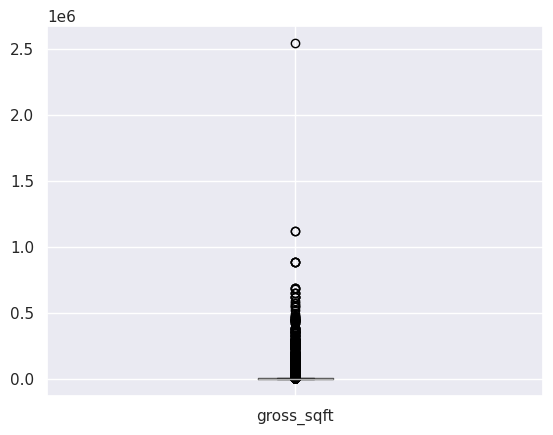

In [23]:
df_house.boxplot(column='gross_sqft')

<Axes: >

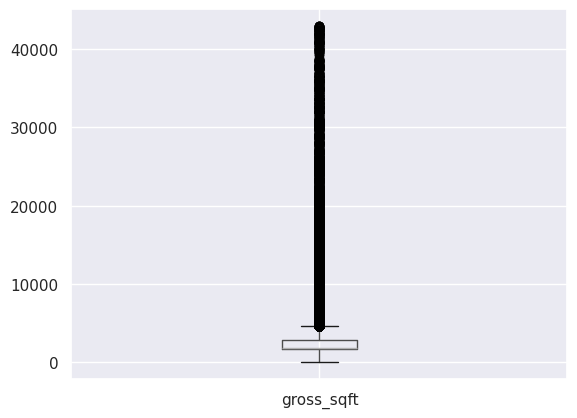

In [24]:
from scipy import stats
df_house = df_house[(np.abs(stats.zscore(df_house)) < 3).all(axis=1)]
df_house.boxplot(column='gross_sqft')

In [25]:
# How expensive are houses?
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    df_house.sale_price.min(), df_house.sale_price.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    df_house.sale_price.mean(), df_house.sale_price.median()))

The cheapest house sold for $1 and the most expensive for $9,450,000
The average sales price is $628,742, while median is $500,000


In [26]:
# When were the houses built?
print('Oldest house built in {}. Newest house built in {}.'.format(
    df_house.year_built.min(), df_house.year_built.max()))

Oldest house built in 0. Newest house built in 2017.


**Next we remove variables those are highly correlated by evaluating their Variable Inflation Factor. We remove one variable each step and again calculate the VIF and then remove the next. We remove all variables with VIF>5 by this way to minimize correlation among the variables. We show a few and the rest are done in a similar way.**

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

X: vector/matrix used to represent the features of the data.

* the first dimension: number of elements of the training dataset (number of training data samples)
* the remaining dimensions: features

y: desired data label (index of target name)

In [28]:
# Spliting dataset
X = df_house.drop('sale_price',axis=1)
y = df_house['sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
0,3.6,neighborhood
1,3.2,tax_class
2,10.1,block
3,13.0,lot
4,30.9,building_class
5,193739.1,zip_code
6,34867.1,residential_units
7,252.2,commercial_units
8,36445.2,total_units
9,19.1,land_sqft


In [30]:
del df_house['zip_code']

In [31]:
X = df_house.drop('sale_price',axis=1)
y = df_house['sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
0,3.6,neighborhood
1,3.2,tax_class
2,10.0,block
3,13.0,lot
4,30.9,building_class
5,34867.0,residential_units
6,252.2,commercial_units
7,36445.1,total_units
8,19.1,land_sqft
9,16.4,gross_sqft


In [33]:
del df_house['total_units']

It should continue this way resulting in the deletion of the following variables.

In [35]:
columns = ['YearAlter2', 'XCoord', 'year_of_sale',  'YCoord', 'ComArea','LotDepth', 'LotType', 'NumFloors', 'LotFront',
           'tax_class_at_sale', 'building_class', 'ResArea', 'SplitZone', 'BldgDepth', 'ResidFAR', 'LandUse', 'HealthArea', 'gross_sqft', 'BldgFront',
           'year_built', 'IrrLotCode', 'AssessTot', 'land_sqft', 'FacilFAR', 'building_class_at_sale', 'NumBldgs','CommFAR', 'OfficeArea', 'BsmtCode', 'OtherArea',
           'StrgeArea', 'GarageArea', 'FactryArea', 'street name', 'OwnerName', 'commercial_units', 'YearAlter1', 'ProxCode', 'RetailArea']
df_house.drop(columns, inplace=True, axis=1)

In [36]:
df_house.columns.values

array(['neighborhood', 'tax_class', 'block', 'lot', 'residential_units',
       'sale_price', 'AssessLand', 'ExemptLand', 'ExemptTot', 'HistDist',
       'BuiltFAR'], dtype=object)

**neighborhood**: surrounding area

**tax_clas**s: tax class

**block**: The tax block in which the tax lot is located

**lot**: The number of the tax lot.

**residential_units**: means a home, apartment, residential condominium unit or mobile home, serving as the principal place of residence.

**AssessLand**: The assessed land value for the tax lot.

**ExemptLand**: Tax-free land

**ExemptTot**: The exempt total value, which is determined differently for each exemption program, is the dollar amount related to that portion of the tax lot that has received an exemption.

**HistDist**: The name of the Historic District that the tax lot is within. Historic Districts are designated by the New York City Landmarks Preservation Commission.

**BuiltFAR**: total construction floor area divided by tax lot area.

In [37]:
df_house.shape

(202178, 11)

In [38]:
df_house.head()

,neighborhood,tax_class,block,lot,residential_units,sale_price,AssessLand,ExemptLand,ExemptTot,HistDist,BuiltFAR
1131,27,2.0,5124,18,39,9450000.0,101250.0,0.0,0.0,0,2.90
1132,27,2.0,5124,45,38,9450000.0,85500.0,0.0,0.0,0,3.79
1136,20,2.0,1206,31,41,9400000.0,127800.0,0.0,0.0,0,4.19
1137,9,1.0,274,28,2,9400000.0,38370.0,0.0,0.0,8,1.26
1139,2,2.0,5979,46,0,9385000.0,290250.0,0.0,0.0,0,3.90


**Visualising Numeric Variables**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


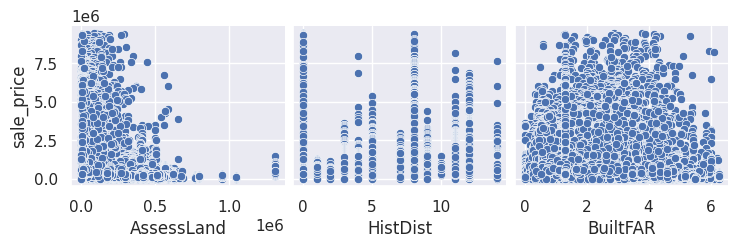

In [42]:
import seaborn as sns
sns.pairplot(df_house,y_vars=['sale_price'], x_vars=['AssessLand', 'HistDist', 'BuiltFAR'],palette='Dark2')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


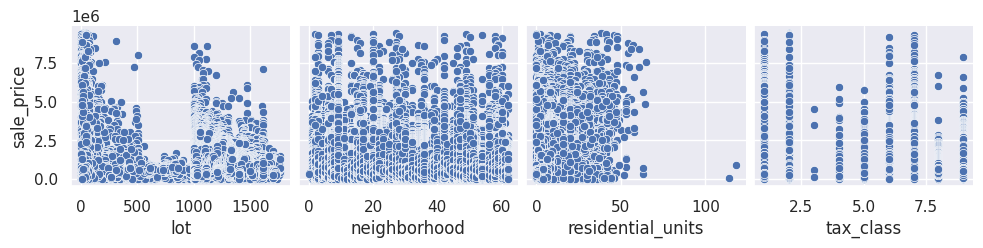

In [45]:
sns.pairplot(df_house,y_vars=['sale_price'], x_vars=['lot', 'neighborhood', 'residential_units', 'tax_class'],palette='Dark2')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


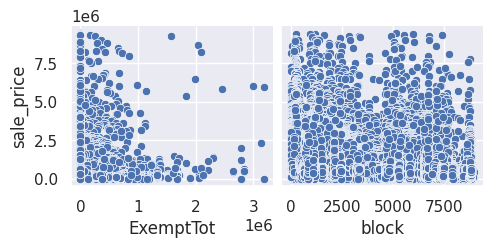

In [49]:
sns.pairplot(df_house,y_vars=['sale_price'], x_vars=['ExemptTot', 'block'],palette='Dark2')

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


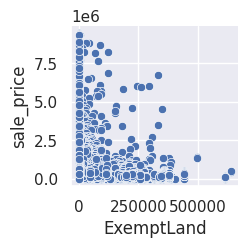

In [55]:
sns.pairplot(df_house,y_vars=['sale_price'], x_vars=['ExemptLand'],palette='Dark2')

# **5) Build model**

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

random_state : The result is the same every time

r2 : evaluate the accuracy of the model, the closer r2 is to 1 the better

In [57]:
# Split data
X = df_house.drop('sale_price',axis=1)
y = df_house['sale_price']
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X,y,test_size=0.3, random_state=42)

# Define models
models = [LinearRegression(),
          linear_model.Lasso(alpha=0.1),
          Ridge(alpha=100.0),
          #DecisionTreeClassifier(random_state=0),
          RandomForestRegressor(n_estimators=100, max_features='sqrt'),
          KNeighborsRegressor(n_neighbors=6), # số láng giềng bằng 6
          DecisionTreeRegressor(max_depth=4),
          ensemble.GradientBoostingRegressor()]

# Evaluate models
results = []

for model in models:
    print(model)
    model_name = model.__class__.__name__
    model.fit(Xtrn, Ytrn)

    r2 = r2_score(Ytest, model.predict(Xtest))

    print('Score on training:', model.score(Xtrn, Ytrn))
    print('R² score on test:', r2)
    print('\n')

    results.append({'Model': model_name, 'R2_Price': r2})

# Create results DataFrame
TestModels = pd.DataFrame(results).set_index('Model')
TestModels


LinearRegression()
Score on training: 0.18215850271559375
R² score on test: 0.1874216581632112


Lasso(alpha=0.1)
Score on training: 0.18215850271549938
R² score on test: 0.18742165926019427


Ridge(alpha=100.0)
Score on training: 0.1821584982203831
R² score on test: 0.18742162629729042


RandomForestRegressor(max_features='sqrt')
Score on training: 0.8467280963779977
R² score on test: 0.4198131065684292


KNeighborsRegressor(n_neighbors=6)
Score on training: 0.5007438566798692
R² score on test: 0.2947260873601697


DecisionTreeRegressor(max_depth=4)
Score on training: 0.2377124617548888
R² score on test: 0.23628308101437834


GradientBoostingRegressor()
Score on training: 0.3924154077032822
R² score on test: 0.37779821889884635




,R2_Price
Model,
LinearRegression,0.187422
Lasso,0.187422
Ridge,0.187422
RandomForestRegressor,0.419813
KNeighborsRegressor,0.294726
DecisionTreeRegressor,0.236283
GradientBoostingRegressor,0.377798


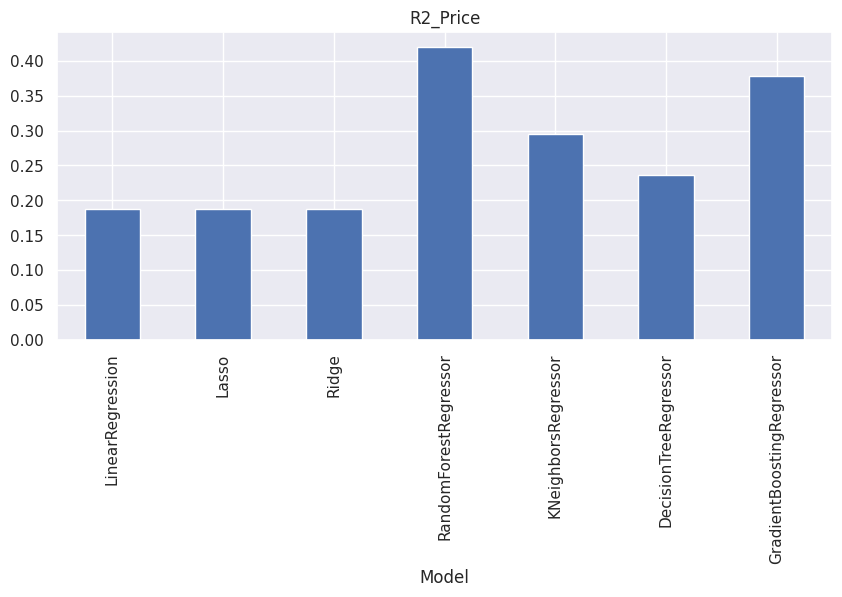

In [58]:
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')
plt.show()

**We see that GradientBoostingRegressor is the best model for us as scores on both training and testing sets are close, indicating no overfitting. So we choose it and apply grid search CV to find out best set of parameters. We dont run this step as it is really time consuming. We state the final result and use it in prediction.**

# **6) Prediction**

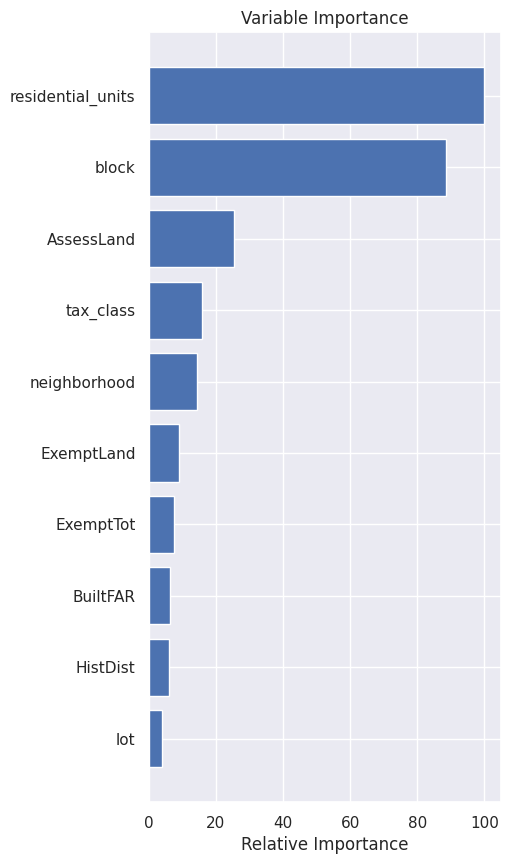

In [59]:
feature_cols =['neighborhood', 'tax_class', 'block', 'lot', 'residential_units', 'AssessLand', 'ExemptLand', 'ExemptTot', 'HistDist', 'BuiltFAR']
target=['sale_price']

# dropna() : Remove observations with missing values
X = df_house[feature_cols].dropna()

# ravel is used to convert Matrix to Vector
y = np.array(df_house[target].dropna()).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# use linear regression as the model
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)

# Plot feature importance
feature_importance = model.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**We do grid search to find out the best parameters for Gradient Boosting Regressor. Since there is a trade off between the parameters 'learning_rate' and 'n_estimators' we try to find out the best values for them. Other parameters are accepted at their default values.**

Evaluate the points on the grid to see which position will help the training model achieve the best results. => Helps find an effective parameter set

In [60]:
X = df_house.drop('sale_price',axis=1)
y = df_house['sale_price']
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X, y,test_size=0.3, random_state=42)

model = ensemble.GradientBoostingRegressor()
parameters = {'learning_rate':[0.1,0.2,0.3],'n_estimators':[50,100,150]}

# cv = 3, divides the dataset into 3, each parameter set has 3 swaps
grid_obj = GridSearchCV(model, parameters, refit=True, cv=3, verbose=10)
grid_obj = grid_obj.fit(Xtrn, Ytrn)
print(grid_obj.fit(Xtrn, Ytrn))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3; 1/9] START learning_rate=0.1, n_estimators=50..........................
[CV 1/3; 1/9] END learning_rate=0.1, n_estimators=50;, score=0.329 total time=   7.9s
[CV 2/3; 1/9] START learning_rate=0.1, n_estimators=50..........................
[CV 2/3; 1/9] END learning_rate=0.1, n_estimators=50;, score=0.336 total time=   8.2s
[CV 3/3; 1/9] START learning_rate=0.1, n_estimators=50..........................
[CV 3/3; 1/9] END learning_rate=0.1, n_estimators=50;, score=0.343 total time=   8.0s
[CV 1/3; 2/9] START learning_rate=0.1, n_estimators=100.........................
[CV 1/3; 2/9] END learning_rate=0.1, n_estimators=100;, score=0.369 total time=  16.3s
[CV 2/3; 2/9] START learning_rate=0.1, n_estimators=100.........................
[CV 2/3; 2/9] END learning_rate=0.1, n_estimators=100;, score=0.368 total time=  15.3s
[CV 3/3; 2/9] START learning_rate=0.1, n_estimators=100.........................
[CV 3/3; 2/9] END lear

In [61]:
grid_obj.best_params_

{'learning_rate': 0.3, 'n_estimators': 150}

RMSE: Evaluate the difference -> the closer to 0 the better

In [62]:
# Get best parameters and fit model
params = grid_obj.best_params_
model = ensemble.GradientBoostingRegressor(**params)
model.fit(Xtrn, Ytrn.values.ravel())

# RMSE on final prediction
Ypred = model.predict(Xtest)
model_mse = mean_squared_error(Ytest, Ypred)
model_rmse = np.sqrt(model_mse)

print('Gradient Boosting RMSE: %.4f' % model_rmse)
print('Score on training:', model.score(Xtrn, Ytrn))
print('R² score on test:', r2_score(Ytest, Ypred))

# Show predictions
df = pd.DataFrame({'Actual': Ytest, 'Predicted': Ypred, 'Difference': Ypred - Ytest})
print(df.head())

# Track test MSE during staged prediction
test_score = np.zeros(params['n_estimators'], dtype=np.float64)

for i, Ypred_stage in enumerate(model.staged_predict(Xtest)):
    test_score[i] = mean_squared_error(Ytest, Ypred_stage)


Gradient Boosting RMSE: 456945.9228
Score on training: 0.4620313709515623
R² score on test: 0.4114707821710608
           Actual      Predicted     Difference
306243   365000.0  603827.532069  238827.532069
26454   1120000.0  499971.260757 -620028.739243
33034    975000.0  741522.780406 -233477.219594
348204   130000.0  236232.389733  106232.389733
17596   1400219.0  435383.350870 -964835.649130


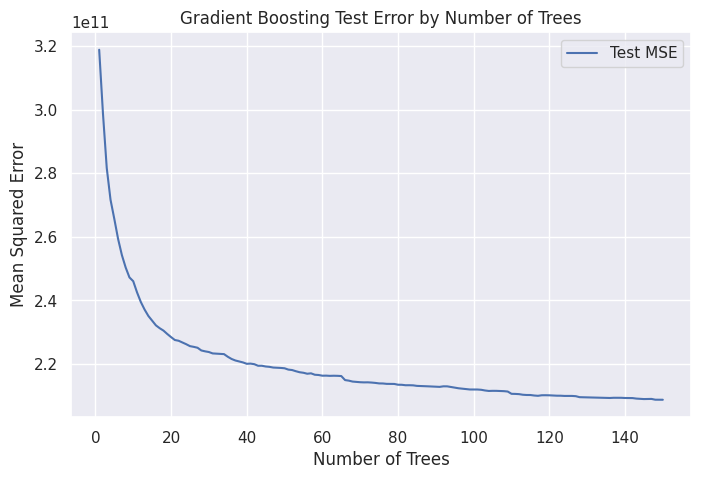

In [63]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(params['n_estimators']) + 1, test_score, label='Test MSE')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Boosting Test Error by Number of Trees')
plt.legend()
plt.grid(True)
plt.show()

Text(0, 0.5, 'Deviance')

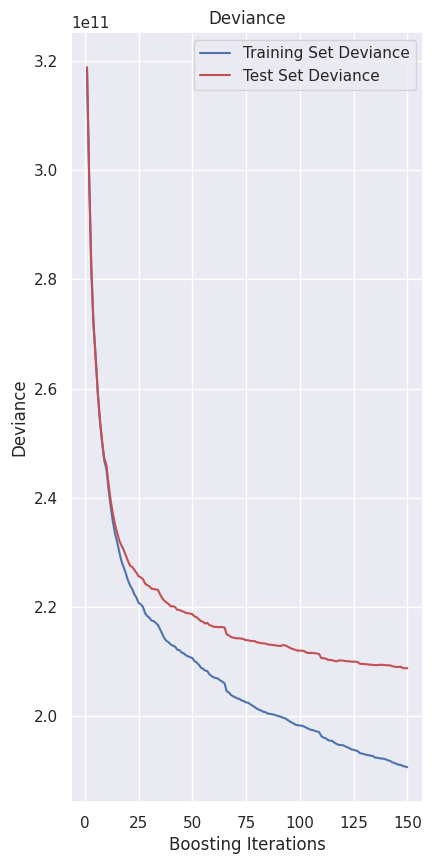

In [64]:
# Plot training deviance
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, model.train_score_, 'b-',label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations') # x-axis: features
plt.ylabel('Deviance') # y-axis: predict

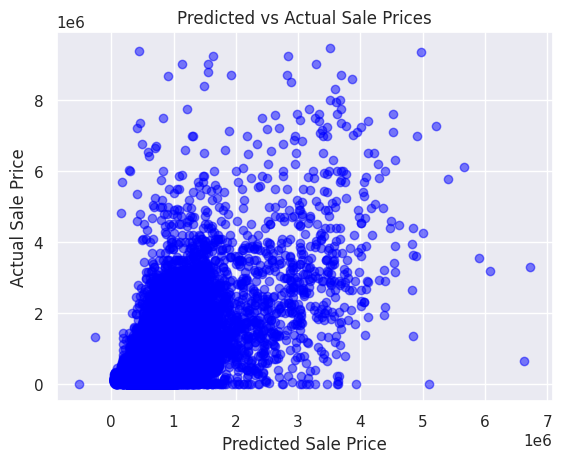

In [65]:
# plt.figure(figsize=(8, 6))
plt.scatter(Ypred, Ytest, color='blue', alpha=0.5)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.title('Predicted vs Actual Sale Prices')
plt.grid(True)
plt.show()